In [1]:
%pylab inline
import skimage.io
from scipy.ndimage.morphology import binary_erosion, binary_dilation

Populating the interactive namespace from numpy and matplotlib


# Лаб №3

Дата сдачи: 17-10-2016 00:00 MSK UTC+3

### 3. Построение выпуклой оболочки

Разработать программу построения выпуклой оболочки бинарного объекта на основе преобразований утолщения.

Содержание отчета:

- Исходные изображения
- Код программы
- Результат работы программы

In [2]:
def fancy_show(imgs, *, n_cols=None, fig_dim=None):
    if type(imgs) == numpy.ndarray:
        imgs = [imgs]
    if len(imgs) == 1:
        n_rows = 1
        n_cols = 1
        if fig_dim == None:
            fig_dim = 5
        figsize = (fig_dim, fig_dim)
    else:
        if n_cols == None:
            n_cols = min(len(imgs), 3)
        n_rows = int(ceil(len(imgs) / n_cols))
        if fig_dim == None:
            fig_dim = 15
    figsize = (fig_dim, fig_dim / n_cols * n_rows)
    fig = plt.figure(figsize=figsize)
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        ax.imshow(img, cmap='gray', interpolation='none')

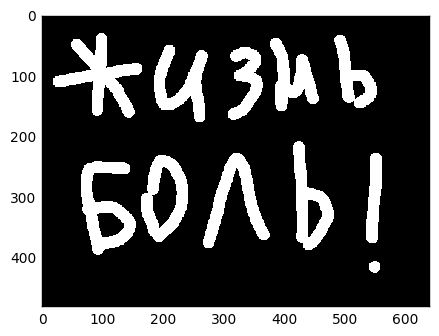

In [3]:
img = (imread('not-convex.png') > 0.5)
if len(img.shape) == 3:
    img = img[:, :, 0]
fancy_show(img)

Structure element mini-golf

In [4]:
c = array([1] * 4 + [0] * 4, dtype=bool)
perm = [0, 1, 2, 7, 8, 3, 6, 5, 4]
struct_hit = array([concatenate((roll(c, i), [False]))[perm].reshape((3, 3)) for i in range(8)])
struct_miss = array([0] * 9, dtype=bool).reshape(3, 3)
struct_miss[1, 1] = 1

In [5]:
def thicken(img, hit, miss):
    img_hit = binary_erosion(img, hit)
    img_miss = binary_erosion(invert(img), miss)
    return img + img_hit * img_miss

def thick_step(img):
    for hit in struct_hit:
        img = thicken(img, hit, struct_miss)
    return img

def convexize(img):
    while True:
        img_new = thick_step(img)
        if all(img_new == img):
            break
        img = img_new
    return img

CPU times: user 13.7 s, sys: 10 ms, total: 13.7 s
Wall time: 13.7 s


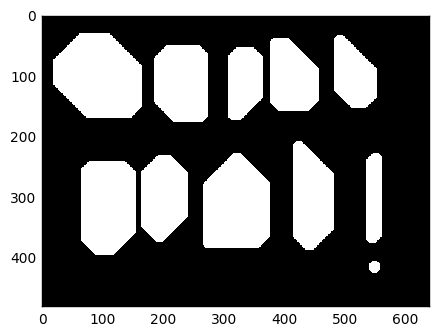

In [6]:
%time convex = convexize(img)
fancy_show(convex)

Теперь так не скажешь.